In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import defaultdict, Counter
import heapq

In [55]:
log = pd.read_csv("data/logs.csv", parse_dates=["timestamp"])
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   200 non-null    datetime64[ns]
 1   event_type  200 non-null    object        
 2   user_id     200 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 4.8+ KB


In [56]:
log['event_type'] = log['event_type'].str.strip().str.lower()
log = df.dropna(subset=["timestamp", "event_type", "user_id"])

In [57]:
log["timestamp"] = pd.to_datetime(log["timestamp"], errors='coerce')
log["hour"] = log["timestamp"].dt.hour

events_by_hour = defaultdict(int)
for hour in log["hour"]:
    events_by_hour[hour] += 1

In [58]:
events_log = pd.DataFrame(list(events_by_hour.items()), columns=["hour", "event_count"])
os.makedirs("output", exist_ok=True)
events_log.to_csv("output/summary_by_hour.csv", index=False)

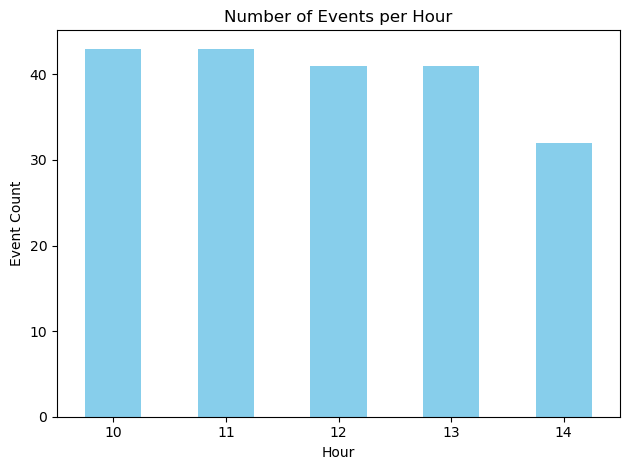

In [59]:
events_log.sort_values("hour").plot(x="hour", y="event_count", kind="bar", color="skyblue", legend=False)
plt.title("Number of Events per Hour")
plt.xlabel("Hour")
plt.ylabel("Event Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("output/events_per_hour.png")

In [60]:
user_counter = Counter(log["user_id"])
top_users = heapq.nlargest(5, user_counter.items(), key=lambda x: x[1])
top_users_log = pd.DataFrame(top_users, columns=["user_id", "event_count"])
top_users_log.to_csv("output/top_users.csv", index=False)

print("Project executed successfully. Outputs saved in 'output/' folder.")

Project executed successfully. Outputs saved in 'output/' folder.


In [61]:
log

,timestamp,event_type,user_id,hour
0,2025-08-01 12:50:00,login,user918,12
1,2025-08-01 12:04:00,click,user664,12
2,2025-08-01 13:43:00,login,user589,13
3,2025-08-01 11:33:00,logout,user598,11
4,2025-08-01 11:00:00,login,user968,11
...,...,...,...,...
195,2025-08-01 10:39:00,view,user361,10
196,2025-08-01 11:32:00,login,user546,11
197,2025-08-01 10:13:00,click,user985,10
198,2025-08-01 12:12:00,login,user144,12


In [62]:
events_log

,hour,event_count
0,12,41
1,13,41
2,11,43
3,14,32
4,10,43


In [63]:
top_users_log

,user_id,event_count
0,user638,11
1,user928,10
2,user232,10
3,user556,10
4,user985,9
